# APPLICATION OF MACHINE LEARNING IN PREDICTING CORPORTE CREDIT RATING

The aim of this analysis is to try to build a machine learning model from the rating data that can be used to predict the rating a company will receive.
~ many models are performed to find the best one that has the most accuracy rate>>>

# A. Explore data analysis (EDA)

# The dataset includes 30 features for various companies, including:
1.liquidity ratios
2. profitability ratios
3.Debt ratios
4.Operatingg performance ratios
5.Cash flow ratios

In [1]:
import pandas as pd
import numpy as np
from numpy import loadtxt
from numpy import sort
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick
from wordcloud import WordCloud, STOPWORDS
from random import sample

In [2]:
pip install WordCloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 12.6 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [39]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.utils import resample
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

In [4]:
#ignore warnings
from warnings import simplefilter
simplefilter(action='ignore',category=FutureWarning)

In [3]:
data = pd.read_csv('/Users/macbook/Desktop/Pandas Course Resources/corporate_rating.csv')
data.head()

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790


<AxesSubplot:>

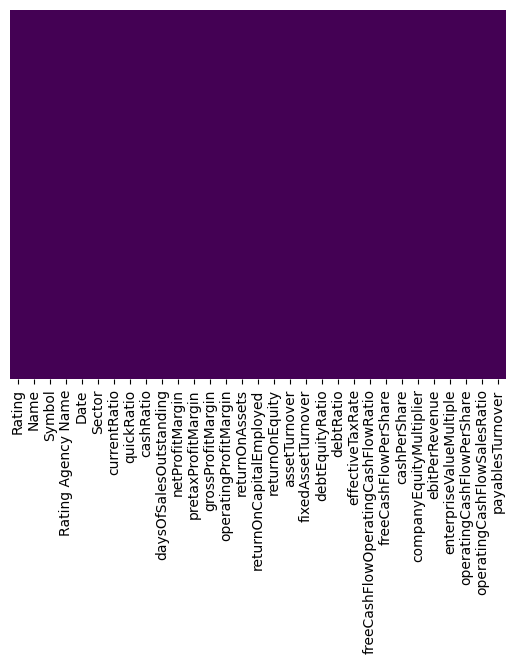

In [4]:
#check the missing data
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

No missing data in the dataset

<AxesSubplot:xlabel='Rating'>

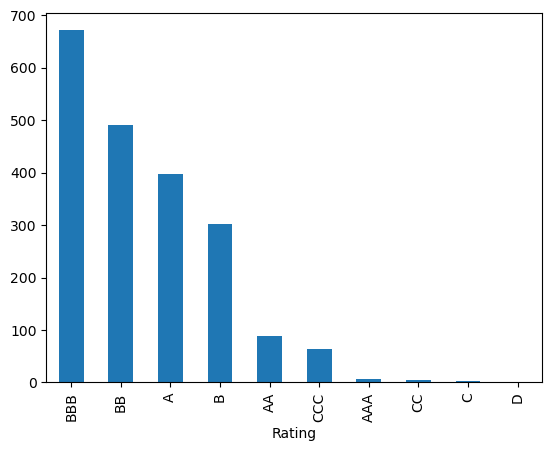

In [5]:
data.Rating.value_counts().plot.bar()

the outcomes is an ordinal variable and unbalanced classification, it worths noting that there are various Rating agency also, so I will transfer this grade into a simplified Rating level

In [6]:
#replace the Rating with the level of risk, according to the classification of Investopedia
rating_dic = {'AAA':'Lowest Risk',
              'AA':'Low Risk', 'A':'Low Risk','BBB':'Medium Risk',
              'BB':'High Risk','B':'High Risk','CCC':'Highest Risk','CC':'Highest Risk',
              'C':'Highest Risk','D':'Default'}
data.Rating=data.Rating.map(rating_dic)
data.head()  

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,Low Risk,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,Medium Risk,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,Medium Risk,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,Medium Risk,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,Medium Risk,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790


Text(0.5, 1.0, 'Count of Rating by Risk Level')

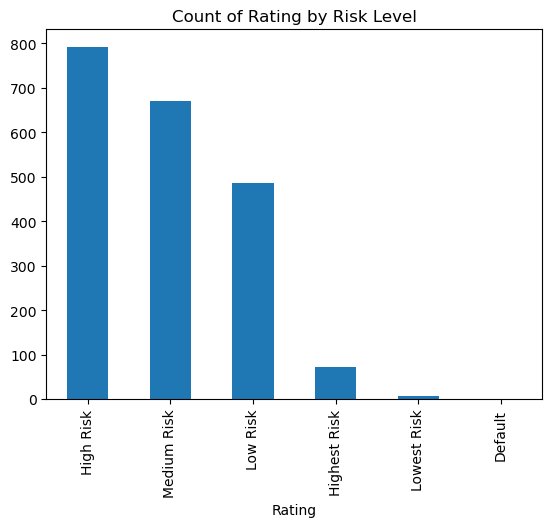

In [7]:
data.Rating.value_counts().plot.bar()
plt.title('Count of Rating by Risk Level')

As the number of Default and Lowest Risk groups are too small, that may affect the analysis, so I will remove these group out of the data

<AxesSubplot:xlabel='Rating'>

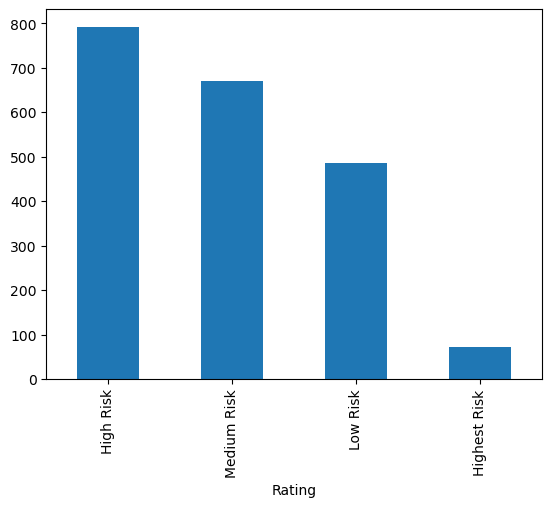

In [28]:

df_1 = data[(data['Rating']!='Lowest Risk')&(data['Rating']!='Default')]

df_1.reset_index(inplace=True,drop=True)
df_1.Rating.value_counts().plot.bar()

In [29]:
df_1.describe()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
count,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,...,2021.000000,2021.000000,2.021000e+03,2.021000e+03,2021.000000,2021.000000,2021.000000,2.021000e+03,2021.000000,2021.000000
mean,3.535411,2.657150,0.669048,334.855415,0.278725,0.432721,0.496900,0.588793,-37.666843,-74.267283,...,0.400755,0.408272,5.114871e+03,4.244248e+03,3.335166,0.438715,48.426558,6.540891e+03,1.452142,38.138233
std,44.139386,33.009920,3.590902,4456.606352,6.076128,9.002733,0.525996,11.246798,1168.476782,2354.920503,...,10.613711,3.803929,1.472059e+05,1.226418e+05,87.702375,9.002047,530.161001,1.778797e+05,19.521704,760.421855
min,-0.932005,-1.893266,-0.192736,-811.845623,-101.845815,-124.343612,-14.800817,-124.343612,-40213.178290,-87162.162160,...,-100.611015,-120.916010,-4.912742e+03,-1.915035e+01,-2555.419643,-124.343612,-3749.921337,-1.195049e+04,-4.461837,-76.662850
25%,1.071930,0.602298,0.131433,22.806507,0.020894,0.025649,0.232565,0.044546,0.018757,0.028112,...,0.147837,0.269616,4.094118e-01,1.562116e+00,2.050249,0.028057,6.235759,2.348851e+00,0.073664,2.202394
50%,1.492804,0.979094,0.297859,42.281804,0.064323,0.084965,0.414217,0.107640,0.045417,0.074639,...,0.300439,0.644265,2.123062e+00,3.680425e+00,2.657275,0.087424,9.269746,4.361649e+00,0.132758,5.775840
75%,2.160710,1.450457,0.625355,59.165369,0.113871,0.144763,0.849693,0.175334,0.077159,0.135036,...,0.370239,0.836949,4.230253e+00,8.027524e+00,3.665438,0.149355,12.898855,7.322553e+00,0.239359,9.500424
max,1725.505005,1139.541703,125.917417,115961.637400,198.517873,309.694856,2.702533,410.182214,0.487826,2.439504,...,429.926282,34.594086,5.753380e+06,4.786803e+06,2562.871795,309.694856,11153.607090,6.439270e+06,688.526591,20314.880400


its easy to capture the variance of min and max values of the columns in the dataset, these outliers will affect the analysis

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='currentRatio'>

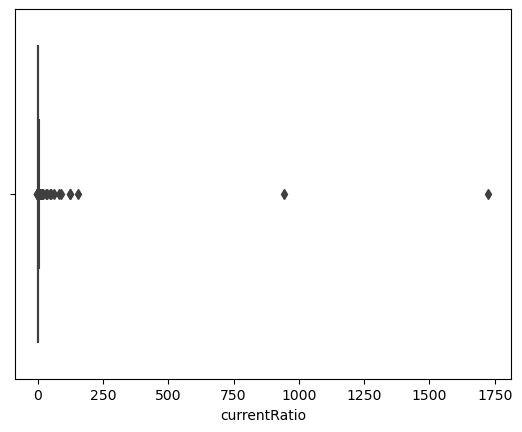

In [13]:
#lets check the outlier plot
sns.boxplot(df_1['currentRatio'])

In [30]:
#normalize the data
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

for c in df_1.columns[6:31]:

    df_1[[c]] = min_max_scaler.fit_transform(df_1[[c]].to_numpy())*1000
    df_1[[c]] = df_1[[c]].apply(lambda x: np.log10(x+0.01))

/var/folders/jn/_l79rv4n2zq089fsjf67h1jw0000gn/T/ipykernel_54928/2154994127.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[[c]] = min_max_scaler.fit_transform(df_1[[c]].to_numpy())*1000
/var/folders/jn/_l79rv4n2zq089fsjf67h1jw0000gn/T/ipykernel_54928/2154994127.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[[c]] = df_1[[c]].apply(lambda x: np.log10(x+0.01))
/var/folders/jn/_l79rv4n2zq089fsjf67h1jw0000gn/T/ipykernel_54928/2154994127.py:7: SettingWithCopyWarning: 
A value is trying to be s

In [31]:
df_1.describe()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
count,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,...,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000
mean,0.178812,0.430726,0.631910,0.877731,2.529070,2.456102,2.939111,2.366071,2.997120,2.997260,...,2.275842,2.889801,-0.059118,-1.766963,2.696696,2.456123,2.402413,0.275069,0.837216,0.617957
std,0.225495,0.187378,0.318760,0.151604,0.102201,0.100888,0.110645,0.099296,0.112607,0.111787,...,0.115144,0.109876,0.120155,0.304634,0.104911,0.100888,0.103841,0.111685,0.147403,0.129440
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,0.068458,0.341699,0.411708,0.854768,2.530398,2.457200,2.933941,2.366829,2.999999,2.999992,...,2.278590,2.891698,-0.063873,-1.843845,2.698694,2.457208,2.401472,0.270167,0.816562,0.588557
50%,0.150608,0.402510,0.591088,0.864772,2.530583,2.457407,2.939157,2.367049,3.000000,2.999993,...,2.279247,2.893039,-0.063723,-1.830634,2.698797,2.457416,2.401823,0.270240,0.822176,0.607754
75%,0.255607,0.468259,0.812720,0.873261,2.530794,2.457616,2.951412,2.367285,3.000000,2.999993,...,2.279548,2.893726,-0.063539,-1.804719,2.698968,2.457632,2.402242,0.270347,0.832122,0.626899
max,3.000004,3.000004,3.000004,3.000004,3.000004,3.000004,3.000004,3.000004,3.000004,3.000004,...,3.000004,3.000004,3.000004,3.000004,3.000004,3.000004,3.000004,3.000004,3.000004,3.000004


In [32]:
#remove the outlier

df = df_1.copy()

for c in df.columns[6:31]:

    q05 = df[c].quantile(0.10)
    q95 = df[c].quantile(0.90)
    iqr = q95 - q05 #Interquartile range
    fence_low  = q05-1.5*iqr
    fence_high = q95+1.5*iqr
    df.loc[df[c] > fence_high,c] = df[c].quantile(0.25) #set the lower boud equal to 1st quantile
    df.loc[df[c] < fence_low,c] = df[c].quantile(0.75) #set the cap with the 3 quantile

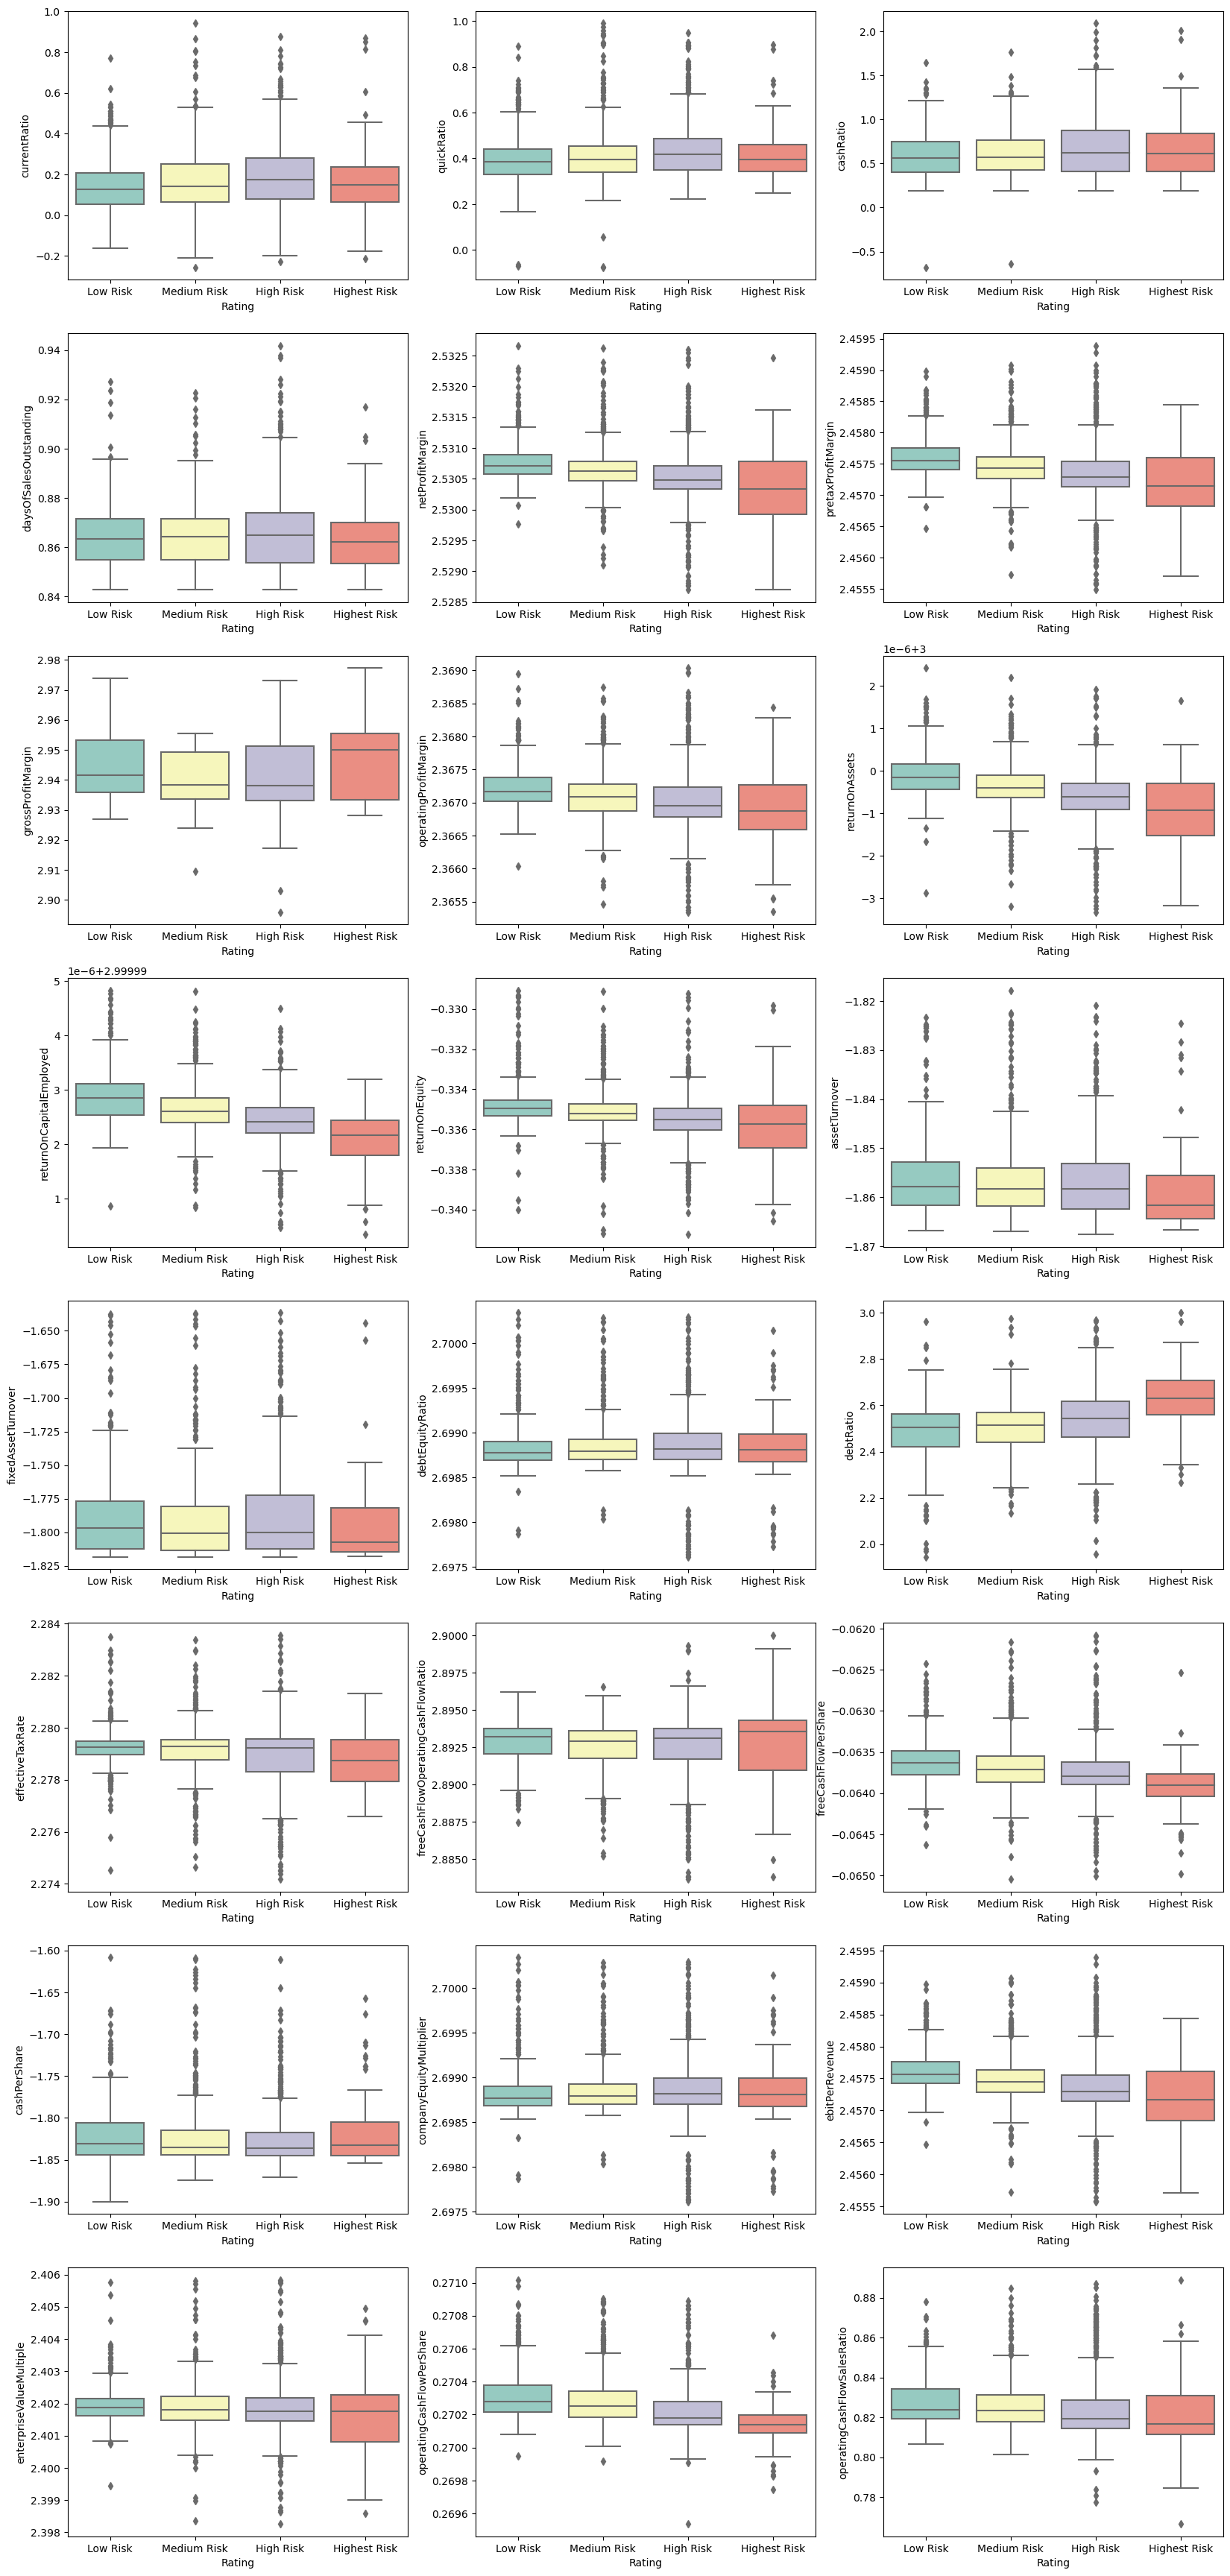

In [33]:
figure, axes = plt.subplots(nrows=8, ncols=3, figsize=(20,44))

i = 0 
j = 0

for c in df.columns[6:30]:
    
    sns.boxplot(x=df.Rating, y=df[c], palette="Set3", ax=axes[i, j])
    
    if j == 2:
        j=0
        i+=1
    else:
        j+=1 

# B. MACHINE LEARNING ALGRITHMS FOR PREDICTION

In [34]:
#encode the descriptive data
le = preprocessing.LabelEncoder()
le.fit(df_1.Sector)
df_1.Sector =le.transform(df_1.Sector)
le.fit(df_1.Rating)
df_1.Rating = le.transform(df_1.Rating)

/var/folders/jn/_l79rv4n2zq089fsjf67h1jw0000gn/T/ipykernel_54928/3451725113.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.Sector =le.transform(df_1.Sector)
/var/folders/jn/_l79rv4n2zq089fsjf67h1jw0000gn/T/ipykernel_54928/3451725113.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.Rating = le.transform(df_1.Rating)


In [35]:
df_1.head()

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,2,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,2,0.040496,0.310105,0.367135,0.865746,...,2.278827,2.892300,-0.063314,-1.794528,2.699027,2.457283,2.401567,0.270644,0.815123,0.597818
1,3,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,2,0.060134,0.323287,0.498169,0.863098,...,2.278272,2.892673,-0.063156,-1.753598,2.698882,2.457281,2.401498,0.270657,0.815948,0.598335
2,3,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,2,0.044558,0.314758,0.399070,0.869096,...,2.278878,2.892570,-0.063063,-1.776295,2.699041,2.457265,2.401964,0.270764,0.816635,0.595537
3,3,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,2,0.057122,0.325481,0.467584,0.864203,...,2.285724,2.890202,-0.063998,-1.769110,2.698963,2.457066,2.401223,0.270331,0.812212,0.601430
4,3,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,2,0.043226,0.322780,0.425078,0.867545,...,2.278673,2.892349,-0.063286,-1.770084,2.699027,2.457298,2.401710,0.270653,0.815068,0.597556


In [37]:
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df_1,test_size=0.2,random_state =1234)

In [38]:
X_train,y_train = df_train.iloc[:,5:31], df_train.iloc[:,0]
X_test, y_test = df_test.iloc[:,5:31], df_test.iloc[:,0]

# Fit models

In [46]:
original_models = {
    "Logistic Regression": LogisticRegression(multi_class = 'multinomial',solver = "newton-cg", random_state= 1234),
    "Naive Bayes": GaussianNB(),
    "Linear Discriminant": LinearDiscriminantAnalysis(),
    "Quadractic Discriminant": QuadraticDiscriminantAnalysis(),
    "KNN model": KNeighborsClassifier(n_neighbors=3),
    "Support Vector Machine (RBF Kernel)": svm.SVC(kernel='rbf',gamma=2,C=5,random_state=1234),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(5,5,5),activation ='logistic',solver ='adam',max_iter=1500),
    "Random Forest": RandomForestClassifier(random_state=1234),
    "Gradient Boosting": GradientBoostingClassifier(random_state=123),
    "XgBoost Classifier": xgb.XGBClassifier(objecttive='multi:softmax',num_class=4)
}

for name, model in original_models.items():
  model.fit(X_train, y_train)
  print(name + ' trained.')

Logistic Regression trained.
Naive Bayes trained.
Linear Discriminant trained.
Quadractic Discriminant trained.
KNN model trained.
Support Vector Machine (RBF Kernel) trained.


/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Neural Network trained.
Random Forest trained.
Gradient Boosting trained.


/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [12:07:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "objecttive" } are not used.

  warnings.warn(smsg, UserWarning)


XgBoost Classifier trained.


In [47]:
original_results = []

for name, model in original_models.items():
  result = model.score(X_test, y_test)
  original_results.append(result)

  print("""
  __________________________"""+name+"""__________________________
  """)

  model = original_models[name]
  y_test_pred = model.predict(X_test)
  arg_test = {'y_true':y_test, 'y_pred':y_test_pred}
  print(confusion_matrix(**arg_test))
  print(classification_report(**arg_test))

  print(name + ': {:.5f}%'.format(result * 100))


  __________________________Logistic Regression__________________________
  
[[133   0   2  13]
 [  8   0   0   0]
 [ 81   0   3  23]
 [111   0   8  23]]
              precision    recall  f1-score   support

           0       0.40      0.90      0.55       148
           1       0.00      0.00      0.00         8
           2       0.23      0.03      0.05       107
           3       0.39      0.16      0.23       142

    accuracy                           0.39       405
   macro avg       0.25      0.27      0.21       405
weighted avg       0.34      0.39      0.30       405

Logistic Regression: 39.25926%

  __________________________Naive Bayes__________________________
  
[[  6   6 118  18]
 [  0   1   6   1]
 [  0   0 101   6]
 [  0   3 122  17]]
              precision    recall  f1-score   support

           0       1.00      0.04      0.08       148
           1       0.10      0.12      0.11         8
           2       0.29      0.94      0.44       107
           3   

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[109   2  15  22]
 [  5   0   3   0]
 [ 29   0  30  48]
 [ 47   0  18  77]]
              precision    recall  f1-score   support

           0       0.57      0.74      0.64       148
           1       0.00      0.00      0.00         8
           2       0.45      0.28      0.35       107
           3       0.52      0.54      0.53       142

    accuracy                           0.53       405
   macro avg       0.39      0.39      0.38       405
weighted avg       0.51      0.53      0.51       405

Support Vector Machine (RBF Kernel): 53.33333%

  __________________________Neural Network__________________________
  
[[148   0   0   0]
 [  8   0   0   0]
 [107   0   0   0]
 [142   0   0   0]]
              precision    recall  f1-score   support

           0       0.37      1.00      0.54       148
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00       107
           3       0.00      0.00      0.00       142

    accuracy       

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression: 39.25926%
Naive Bayes: 30.86420%
Linear Discriminant: 38.76543%
Quadractic Discriminant: 35.55556%
KNN model: 58.02469%
Support Vector Machine (RBF Kernel): 53.33333%
Neural Network: 36.54321%
Random Forest: 65.18519%
Gradient Boosting: 63.45679%
XgBoost Classifier: 69.13580%


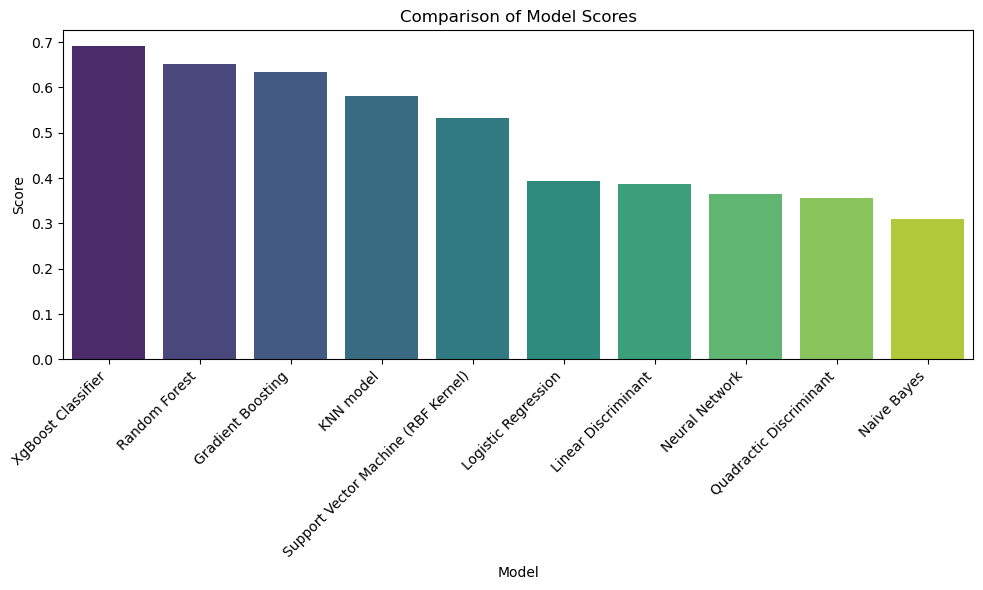

In [50]:
# Create an empty list to store the results
results = []

# Populate the list with tuples containing the model names and scores
for name, model in original_models.items():
    result = model.score(X_test, y_test)
    results.append((name, result))
    print(f"{name}: {result * 100:.5f}%")

# Convert the list of tuples to a DataFrame
dt = pd.DataFrame(results, columns=["Model", "Score"])

# Sort the DataFrame by scores in descending order
dt = dt.sort_values("Score", ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Score", data=dt, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Comparison of Model Scores")
plt.tight_layout()
plt.show()

XGBoost is the model with the highest accuracy score among these models. Therefore, I am going to use this model for the Rating prediction

# XGBOOSTING HYPERPARAMETER TUNNING

in the model comparison, we performed XGboost with 4 different classes, now will try to find the hyperparameter that improve the model performance

In [52]:
#load train and test sets in to DMatrices, a data structure used by 
#XGBoost to optimize both memory efficiency and training speed
dtrain =xgb.DMatrix(X_train, label=y_train)
dtest =xgb.DMatrix(X_test,label=y_test)

In [61]:
#create a dictionary with the parameters from our previous XGBoost model
XGB_model = xgb.XGBClassifier(objecttive='multi:softmax',num_class=4)
XGB_model.fit(X_train,y_train)
params =XGB_model.get_xgb_params()

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [13:28:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "objecttive" } are not used.

  warnings.warn(smsg, UserWarning)


In [60]:
params

{'objective': 'multi:softprob',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'eval_metric': None,
 'gamma': None,
 'grow_policy': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'objecttive': 'multi:softmax',
 'num_class': 4}

In [62]:
params['eval_metric'] = 'merror'

In [63]:
num_boost_round =1000 # the maximum number of boosting rounds we allow

In [64]:
model =xgb.train(params, dtrain, num_boost_round=num_boost_round,
                evals = [(dtest,'Test')],
                early_stopping_rounds =50, verbose_eval =30)
print("Best merror: {:.2f} with {} rounds".format(model.best_score,
                                                 model.best_iteration+1))

[0]	Test-merror:0.45679


/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [13:34:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "objecttive" } are not used.

  warnings.warn(smsg, UserWarning)


[30]	Test-merror:0.32840
[60]	Test-merror:0.33086
[90]	Test-merror:0.32346
[120]	Test-merror:0.31111
[150]	Test-merror:0.31111
[160]	Test-merror:0.31358
Best merror: 0.31 with 111 rounds


#using XGBoost's CV
in order to tune the other hyperparameters, we will use the cv function from XGBoost. it allows us to run cross-validation on our training dataset and returns a mean merror score. we will use a k=5 for every parameter

In [66]:
cv_results =xgb.cv(params, dtrain, num_boost_round=num_boost_round,
                  seed=42, nfold=5,metrics={'merror'},
                  early_stopping_rounds=50, verbose_eval =30)
cv_results.tail()

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [13:38:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "objecttive" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-merror:0.23623+0.00886	test-merror:0.44427+0.02749
[30]	train-merror:0.00031+0.00038	test-merror:0.36942+0.03039
[60]	train-merror:0.00000+0.00000	test-merror:0.35333+0.02610
[90]	train-merror:0.00000+0.00000	test-merror:0.34901+0.02831
[120]	train-merror:0.00000+0.00000	test-merror:0.35333+0.02858
[141]	train-merror:0.00000+0.00000	test-merror:0.35086+0.02422


,train-merror-mean,train-merror-std,test-merror-mean,test-merror-std
88,0.0,0.0,0.352721,0.027251
89,0.0,0.0,0.351483,0.027283
90,0.0,0.0,0.349008,0.028309
91,0.0,0.0,0.350862,0.030253
92,0.0,0.0,0.347768,0.030380


In [68]:
cv_results['test-merror-mean'].min()

0.34776784007950157

Now we are ready to start tuning. we will first tune our parameters to minimize the merror on cross-validation, and then check the performance of our model on the test dataset

In [69]:
gridsearch_params =[(max_depth, min_child_weight) for max_depth in range(5,12)
                   for min_child_weight in range(5,8)]